In [9]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Exercises:


1) Create a directory named regression-exercises within your codeup-data-science directory.


2) Initialize this directory as a git repository.


3) Create a README.md file that outlines the contents.


4) Create a repository on github with the same name (regression-exercises) and link your local repo to the remote.


5) Add, commit, and push the readme file.


6) The filename for this exercise is wrangle.py.


7) As always, add, commit, and push your work.


# Problem 1

Throughout the exercises for Regression in Python lessons, you will use the following example scenario: As a customer analyst, I want to know who has spent the most money with us over their lifetime. I have monthly charges and tenure, so I think I will be able to use those two attributes as features to estimate total_charges. I need to do this within an average of $5.00 per customer. 

The first step will be to acquire and prep the data. Do your work for this exercise in a file named wrangle.py. 

1) Acquire customer_id, monthly_charges, tenure, and total_charges from telco_churn database for all customers with a 2 year contract.

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('Cust_Churn_Telco.csv')

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


2) Walk through the steps above using your new dataframe. You may handle the missing values however you feel is appropriate.


In [14]:
df.TotalCharges.isnull().sum()

11

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
from wrangle import clean_telco

In [17]:
df = clean_telco(df)

In [18]:
df.head()

,customerID,tenure,MonthlyCharges,TotalCharges,Contract_Two year
11,7469-LKBCI,16,18.95,326.80,True
15,3655-SNQYZ,69,113.25,7895.15,True
17,9959-WOFKT,71,106.70,7382.25,True
23,3638-WEABW,58,59.90,3505.10,True
28,5248-YGIJN,72,90.25,6369.45,True


3) End with a python file wrangle.py that contains the function, wrangle_telco(), that will acquire the data and return a dataframe cleaned with no missing values.

In [19]:
from wrangle import wrangle_telco
from sklearn.model_selection import train_test_split

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1695 entries, 11 to 7042
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         1695 non-null   object 
 1   tenure             1695 non-null   int64  
 2   MonthlyCharges     1695 non-null   float64
 3   TotalCharges       1695 non-null   float64
 4   Contract_Two year  1695 non-null   bool   
dtypes: bool(1), float64(2), int64(1), object(1)
memory usage: 67.9+ KB


In [21]:
train1, val1, test1 = wrangle_telco()

In [22]:
train1.head() # left in Contract_Two year to vaidate each row.

,customerID,tenure,MonthlyCharges,TotalCharges,Contract_Two year
3818,8819-ZBYNA,58,109.10,6393.65,True
2254,7322-OCWHC,72,93.05,6735.05,True
4909,3720-DBRWL,51,83.85,4307.10,True
30,3841-NFECX,71,96.35,6766.95,True
6386,6656-GULJQ,72,83.55,6093.30,True


In [23]:
df.isnull().sum()

customerID           0
tenure               0
MonthlyCharges       0
TotalCharges         0
Contract_Two year    0
dtype: int64

In [24]:
df.shape

(1695, 5)

In [25]:
df['Contract_Two year'].value_counts()

True    1695
Name: Contract_Two year, dtype: int64

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(13,5))
for i, col in enumerate(list(df.drop(columns = 'customerID'))):
    plotnum = i + 1
    series = df[col]  
    plt.subplot(1, 3, plotnum)
    plt.title(f'Distribution for {col}')
    series.hist(bins=5)

<AxesSubplot:>

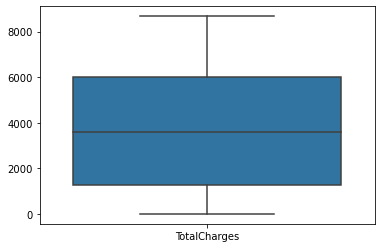

In [48]:
sns.boxplot(data = df[['TotalCharges']])